In [144]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [145]:
from keras.datasets import mnist

In [134]:
img = misc.ascent()

In [148]:
(x_train, y_train), (x_test, y_test) = mnist.load_data('/tmp/mnist.npz')

In [149]:

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [151]:
X_train.shape

(60000, 28, 28)

In [152]:
from keras.layers import Flatten, Activation

In [153]:
from keras import backend as k

In [158]:
from keras.models import Sequential
from keras.layers import Dense

In [159]:
k.clear_session()

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [160]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [163]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [167]:
h=model.fit(x_train, y_train_cat, batch_size=128,
         epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 36s 846us/step - loss: 7.8138 - acc: 0.5137 - val_loss: 6.7789 - val_acc: 0.5769
Epoch 2/2
42000/42000 [==============================] - 35s 835us/step - loss: 6.6613 - acc: 0.5845 - val_loss: 6.5735 - val_acc: 0.5907


Text(0.5, 0, 'Epochs')

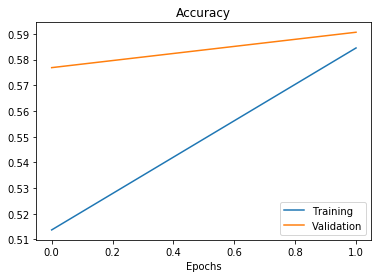

In [168]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [173]:
model.evaluate(x_test, y_test_cat)

10000/10000 [==============================] - 3s 294us/step


[6.602562808227539, 0.5889]